# Vehicle Sales Data Analysis
## Goal:
- Perform Exploratory Data Analysis on the given data, identify key features and insights. 
- Thereby using them, to predict next 6 months sales at vehicle segment 1

## Data:
The dataset shared was used for the analysis.

## Importing the data and other libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# might be needed depending on your version of Jupyter
%matplotlib inline

In [2]:
df = pd.read_excel('Vehicle Sales Data.xlsx')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19666 entries, 0 to 19665
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Vehicle Full Code  19666 non-null  object
 1   Vehicle Code       19666 non-null  object
 2   OEM Model Name     19666 non-null  object
 3   SIAM Company Code  19666 non-null  object
 4   SIAM Segment 1     19654 non-null  object
 5   SIAM Segment 2     19666 non-null  object
 6   SIAM Fuel          19648 non-null  object
 7   Month              19666 non-null  object
 8   Year               19666 non-null  int64 
 9   Production Qty     19666 non-null  int64 
 10  Domestic Sale      19666 non-null  int64 
 11  Export Sale        19666 non-null  int64 
 12  Category           18569 non-null  object
 13  Category Name      18569 non-null  object
 14  YrMth              19666 non-null  object
dtypes: int64(4), object(11)
memory usage: 2.3+ MB


## Data Cleaning:

In [4]:
df.describe().transpose() #Statistics of each numerical column/attribute

,count,mean,std,min,25%,50%,75%,max
Year,19666.0,2015.257399,2.290398,2012.0,2013.0,2015.0,2017.00,2019.0
Production Qty,19666.0,1262.629920,2957.788310,-28.0,0.0,35.0,950.75,33128.0
Domestic Sale,19666.0,1126.482203,2667.334476,-128.0,0.0,77.0,865.75,30499.0
Export Sale,19666.0,238.537628,963.164029,0.0,0.0,0.0,1.00,15088.0


### Info on attributes and samples:
- We observe that there are 15 columns, out of which 4 are numerical.
- And the total number of samples is 19666
- We also observe that there are missing data to deal with

In [5]:
df.isnull().sum().sort_values() #Getting number of missing entries for each attribute

Vehicle Full Code       0
Vehicle Code            0
OEM Model Name          0
SIAM Company Code       0
SIAM Segment 2          0
Month                   0
Year                    0
Production Qty          0
Domestic Sale           0
Export Sale             0
YrMth                   0
SIAM Segment 1         12
SIAM Fuel              18
Category             1097
Category Name        1097
dtype: int64

### Info on missing data:
- We observe that there are 4 columns with missing entries
- Out of which missing data in SIAM Segment 1, Fuel account for less than 0.1% of total samples
- Wheras Category, Category Name account for around 5.5% of total samples

In [6]:
df=df.dropna() #Drop all samples with null values

In [7]:
df.isnull().sum().sort_values() #Getting number of missing entries for each attribute

Vehicle Full Code    0
Vehicle Code         0
OEM Model Name       0
SIAM Company Code    0
SIAM Segment 1       0
SIAM Segment 2       0
SIAM Fuel            0
Month                0
Year                 0
Production Qty       0
Domestic Sale        0
Export Sale          0
Category             0
Category Name        0
YrMth                0
dtype: int64

In [8]:
df['Category'].unique()

array(['PVPC', 'PVUV', 'PVVN'], dtype=object)

In [9]:
df['Category Name'].unique()

array(['Passenger car PV', 'Utility vehicles PV', 'Vans PV'], dtype=object)

#### Dropping Category name column since it's the same as category

In [10]:
df=df.drop('Category Name',axis=1) 

## Exploratory Data Analysis

In [11]:
df.shape[0] #No of samples

18539

In [12]:
df['Vehicle Full Code'].nunique()

394

In [13]:
df['Vehicle Code'].nunique()

168

In [14]:
df['OEM Model Name'].nunique()

172

In [15]:
df['OEM Model Name'].unique()

array(['Passat', 'Camry', 'Prius', 'Superb', 'Teana', 'Santa Fe', 'STILE',
       'Bolero', 'Bolero Plus', 'Quanto', 'CRV', 'PAJRO SFX', 'OUTLANDER',
       'Captiva', 'Endeavour', 'Xenon', 'Aria', 'Trax', 'Force One',
       'Innova', 'ST', 'Commander', 'Armada', 'Versa', 'Trekker',
       'Contessa', 'Fusion', 'Palio', 'Zen', 'Qualis', 'Escort',
       'Phaeton', 'Touareg', 'Maxximo', 'Tavera', 'Enjoy', 'Duster',
       'EVALIA', 'Gypsy', 'Ertiga', 'Etios Sedan', 'DZIRES', 'Verito',
       'Sonata', 'Accord', 'Jetta', 'Corolla', 'Octavia', 'Laura',
       'Renault FLUENCE', 'Kizashi', 'Vento', 'Ambassador', 'Linea',
       'Cruze', 'Elantra', 'Civic', 'Optra', 'Beetle', 'Safari', 'Xylo',
       'Xuv500', 'Scorpio', 'HT', 'Rhino', 'Manza', 'Rapid', 'Scala',
       'Sunny', 'SX4', 'Verna', 'City', 'Aveo', 'Ford Fiesta',
       'Ford Classic', 'Santro', 'Alto', 'A-Star', 'M800', 'LANCER CEDIA',
       'PAJERO SPORT', 'Estilo', 'Celerio', 'MU-7', 'Rexton', 'Vitara',
       'X-Trail', 'Ko

In [16]:
#Top 25 Models and their counts over the entire sample (all Years)
df['OEM Model Name'].value_counts().sort_values(ascending=False).head(25)

Indigo CS       260
Indica          258
Beat            235
Figo            218
Polo            207
City            207
Rapid           207
Micra           206
Grand i10       205
Nano            205
Corolla         198
Verna           198
Swift           197
Elantra         195
Jazz            191
Jetta           190
ACE Magic       189
Etios Sedan     186
Superb          186
Linea           186
Vento           186
Sunny           186
Duster          186
Ertiga          186
Grande Punto    185
Name: OEM Model Name, dtype: int64

In [17]:
#Last 25 Models and their counts over the entire sample (all Years)
df['OEM Model Name'].value_counts().sort_values(ascending=False).tail(25)

Soft and Hard Top    42
Qualis               42
Contessa             41
Versa                40
Armada               40
Commander            40
TRAILBLAZER          39
ABARTH 595           37
X-Trail              35
PAJRO SFX            28
Lancer               24
Fusion               21
X1                   20
Trekker              18
Escort               14
Indigo CSD           12
Indigo               10
LANCER CEDIA          9
Pajero                5
XC 90                 2
S 60                  2
Mondeo                2
Voyager               2
Forester              2
Sumo Grande           1
Name: OEM Model Name, dtype: int64

In [18]:
df['SIAM Company Code'].nunique()

20

<AxesSubplot:>

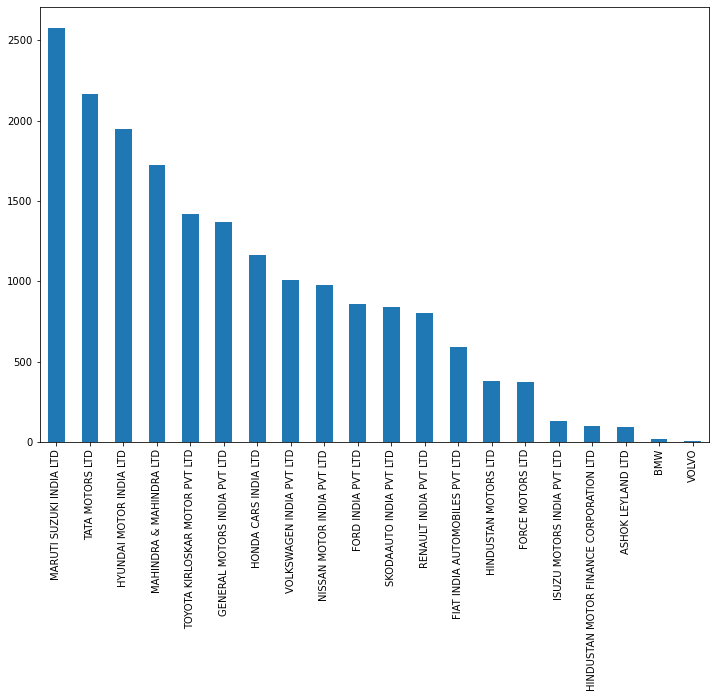

In [19]:
#Counts of different vehicle companies over the entire sample (all Years)
plt.figure(figsize=(12,8))
df['SIAM Company Code'].value_counts().sort_values(ascending=False).plot(kind='bar') 

In [20]:
df['SIAM Segment 1'].nunique()

12

In [21]:
df['SIAM Segment 1'].unique()

array(['E', 'Premium Car 3', 'SUV', 'MPV', 'B+', 'C', 'Premium Cars 1',
       'D', 'C+', 'B', 'A', 'A LOW'], dtype=object)

<AxesSubplot:ylabel='SIAM Segment 1'>

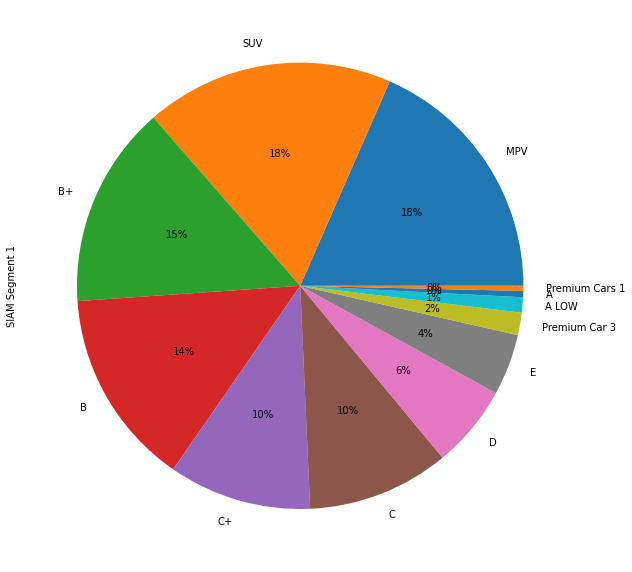

In [22]:
#Distribution of Segment 1
plt.figure(figsize=(10,15))
df['SIAM Segment 1'].value_counts().sort_values(ascending=False).plot(kind='pie',autopct='%.0f%%') 

In [23]:
df['SIAM Segment 2'].unique()

array(['Premium:', 'UV4:', 'UV1', 'UV2', 'UV3', 'Compact:',
       'Super Compact', 'V2:', 'Executive', 'Mid-Size', 'Mini:', 'UV5:',
       'V1:', 'Micro', 'B'], dtype=object)

<AxesSubplot:ylabel='SIAM Segment 2'>

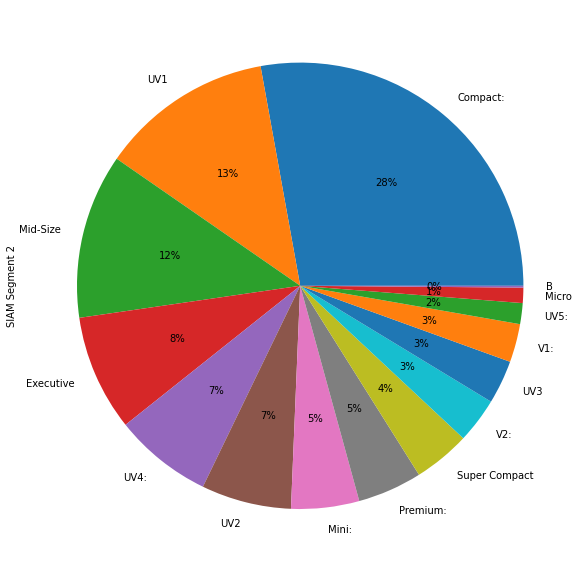

In [24]:
#Distribution of Segment 2
plt.figure(figsize=(10,15))
df['SIAM Segment 2'].value_counts().sort_values(ascending=False).plot(kind='pie',autopct='%.0f%%')

In [25]:
df['SIAM Fuel'].unique()

array(['DIESEL', 'PETROL', 'CNG', 'LPG', 'HYBRID'], dtype=object)

<AxesSubplot:ylabel='SIAM Fuel'>

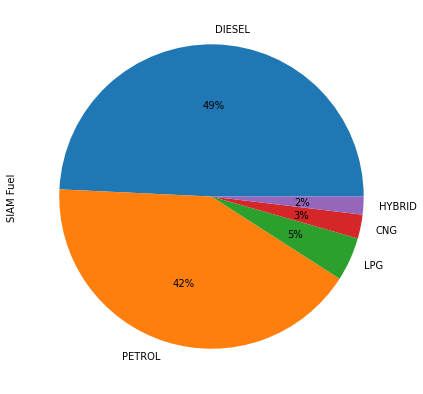

In [26]:
#Fuel type Distribution
plt.figure(figsize=(7,7))
df['SIAM Fuel'].value_counts().sort_values(ascending=False).plot(kind='pie',autopct='%.0f%%')

In [27]:
df[['YrMth','Month','Year']]

,YrMth,Month,Year
0,01-04-2012,APR,2012
1,01-04-2012,APR,2012
2,01-04-2012,APR,2012
3,01-04-2012,APR,2012
4,01-04-2012,APR,2012
...,...,...,...
19661,01-12-2019,DEC,2019
19662,01-12-2019,DEC,2019
19663,01-12-2019,DEC,2019
19664,01-12-2019,DEC,2019


#### We can observe that information contained in YrMth is already in Month, Year

In [28]:
#df=df.drop('YrMth',axis=1)

#### Observing correlation between numerical variables

In [29]:
df.corr()

,Year,Production Qty,Domestic Sale,Export Sale
Year,1.000000,0.184815,0.115980,0.111301
Production Qty,0.184815,1.000000,0.887989,0.505169
Domestic Sale,0.115980,0.887989,1.000000,0.210329
Export Sale,0.111301,0.505169,0.210329,1.000000


<AxesSubplot:>

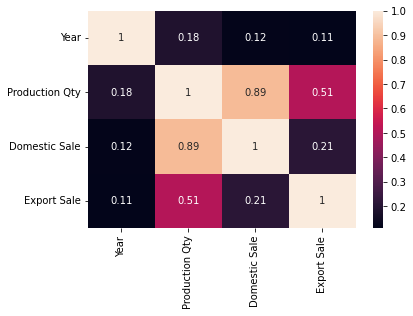

In [30]:
sns.heatmap(df.corr(),annot=True)

#### Correlation between Production Qty and Domestic Sale

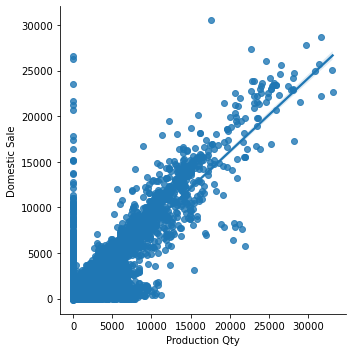

In [31]:
sns.lmplot(x='Production Qty',y='Domestic Sale',data=df)

#### We can observe that domestic sale is linear with production qty which makes sense, since production rises with demand

#### Creating a new column Total Sale with sum of domestic, export sale

In [32]:
df['Total Sale']=df['Domestic Sale']+df['Export Sale']

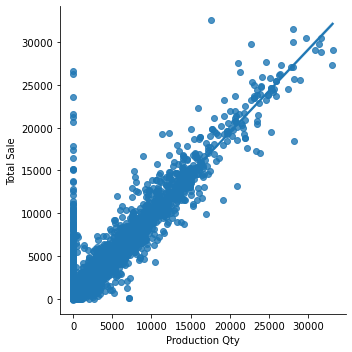

In [33]:
sns.lmplot(x='Production Qty',y='Total Sale',data=df)

In [34]:
df.groupby('Year').sum()

,Production Qty,Domestic Sale,Export Sale,Total Sale
Year,,,,
2012,0,1838742,0,1838742
2013,3155397,2555367,595627,3150994
2014,3157816,2570624,622425,3193049
2015,3368196,2772745,632075,3404820
2016,3676537,2965582,738253,3703835
2017,3764849,3067695,716692,3784387
2018,3768885,3105866,655167,3761033
2019,3023255,2418628,652965,3071593


#### We can observe from the scatterplot and the above table that for the year 2012, the production qty is filled with zeros, though there are domestic sales, hence we fill the zeros with linear model approximations using the Total Sale column

In [35]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
df_sub=df[df['Year']!=2012]
x = df_sub['Total Sale'].values
y = df_sub['Production Qty'].values
x=x.reshape(-1, 1)
y=y.reshape(-1, 1)
model = LinearRegression().fit(x,y)
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

intercept: [13.05667249]
slope: [[0.984789]]


In [36]:
def fillzero(t_sale,prod_qty,year): #Function to fill the zero values of Production Qty (2012 year) with the linear model approx
    if(prod_qty==0 and year==2012):
        return int(model.coef_*t_sale)
    else: return prod_qty 

In [37]:
df['Production Qty']=df.apply(lambda x: fillzero(x['Total Sale'],x['Production Qty'],x['Year']),axis=1)

<AxesSubplot:xlabel='Production Qty', ylabel='Total Sale'>

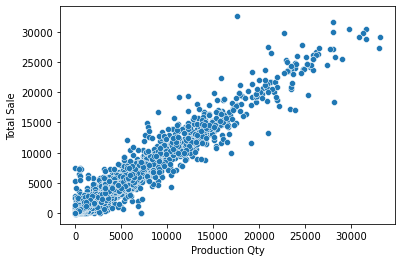

In [38]:
sns.scatterplot(x='Production Qty',y='Total Sale',data=df)

### Time Series Analysis:

#### History of Total Sales over the years

<AxesSubplot:xlabel='Year', ylabel='Total Sale'>

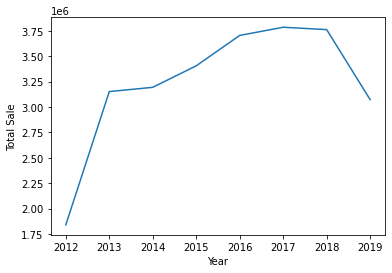

In [39]:
sns.lineplot(data=df.groupby('Year').sum(), x="Year", y="Total Sale")

#### History of Total Sales(Avg) for each month

For all the years from 2013

<AxesSubplot:xlabel='Month'>

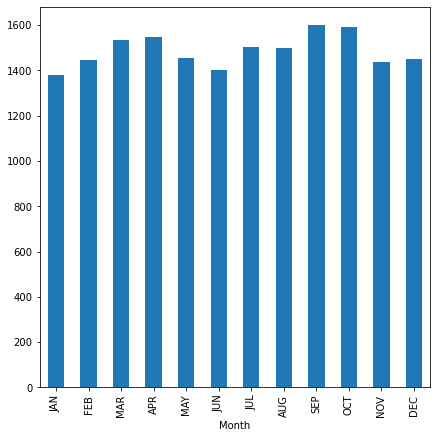

In [40]:
plt.figure(figsize=(7,7))
df[df['Year']>=2013].groupby('Month',sort=False).mean()['Total Sale'].plot(kind='bar')

For the last 3 years (2017-2019)

<AxesSubplot:xlabel='Month'>

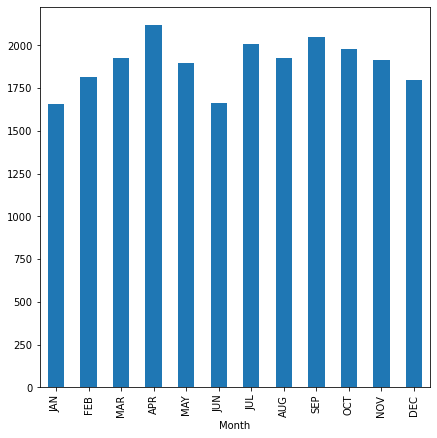

In [41]:
plt.figure(figsize=(7,7))
df[df['Year']>=2017].groupby('Month',sort=False).mean()['Total Sale'].plot(kind='bar')

For the year 2019

<AxesSubplot:xlabel='Month'>

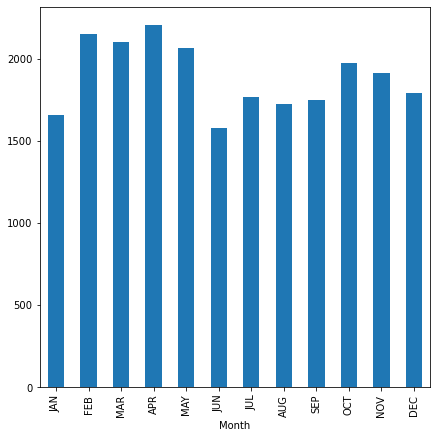

In [42]:
plt.figure(figsize=(7,7))
df[df['Year']==2019].groupby('Month',sort=False).mean()['Total Sale'].plot(kind='bar')

In [43]:
df.groupby('YrMth',sort=False).mean()

,Year,Production Qty,Domestic Sale,Export Sale,Total Sale
YrMth,,,,,
01-04-2012,2012.0,809.745318,822.498127,0.000000,822.498127
01-05-2012,2012.0,808.188462,820.957692,0.000000,820.957692
01-06-2012,2012.0,761.252918,773.276265,0.000000,773.276265
01-07-2012,2012.0,741.813230,753.548638,0.000000,753.548638
01-08-2012,2012.0,646.547529,656.798479,0.000000,656.798479
...,...,...,...,...,...
01-08-2019,2019.0,1796.696970,1209.151515,516.530303,1725.681818
01-09-2019,2019.0,1704.104478,1312.104478,436.343284,1748.447761
01-10-2019,2019.0,1555.133333,1624.400000,349.288889,1973.688889


#### Average Sales history over the entire period from 2013

In [44]:
df['YrMth_Date']=pd.to_datetime(df['YrMth'],dayfirst=True)

<AxesSubplot:xlabel='YrMth', ylabel='Total Sale'>

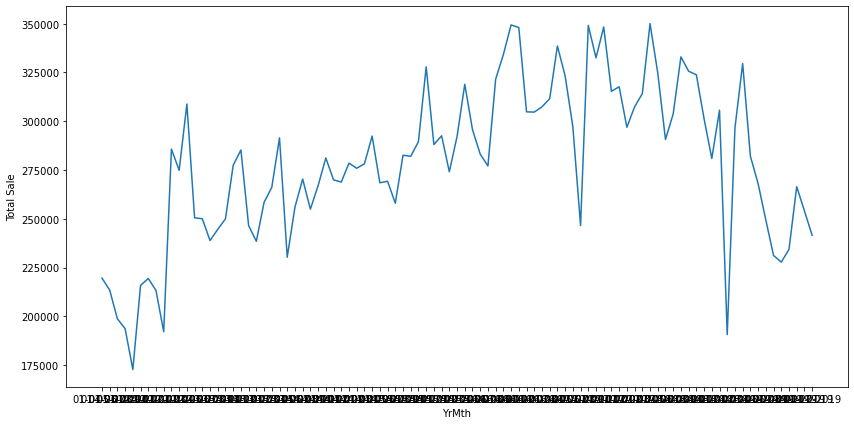

In [45]:
plt.figure(figsize=(14,7))
sns.lineplot(data=df.groupby('YrMth',sort=False).sum(), y="Total Sale", x="YrMth")

#### Total Sale distribution over Fuel type

<AxesSubplot:ylabel='Total Sale'>

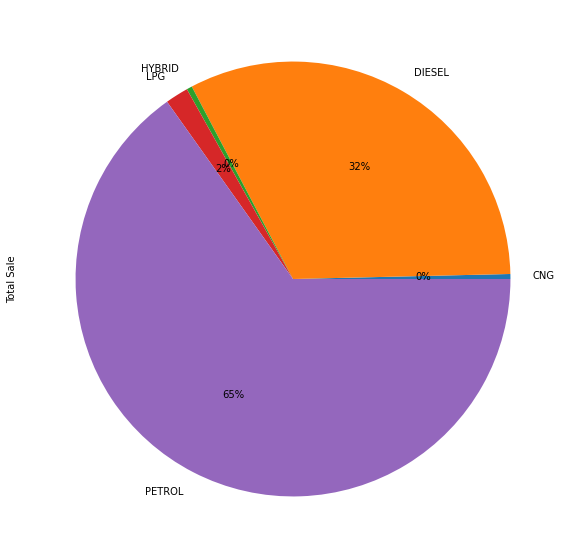

In [46]:
plt.figure(figsize=(14,10))
df.groupby('SIAM Fuel').mean()['Total Sale'].plot(kind='pie',autopct='%.0f%%')

<AxesSubplot:xlabel='Year', ylabel='Total Sale'>

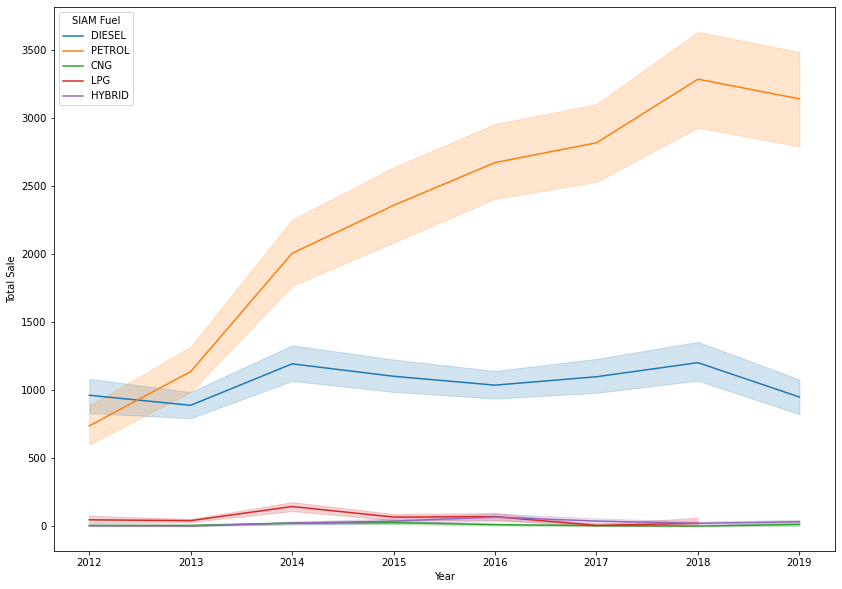

In [47]:
plt.figure(figsize=(14,10))
sns.lineplot(data=df, x="Year", y="Total Sale",hue="SIAM Fuel")

Since the dominant fuel types are masking the patterns of other fuel types, we plot them separately

<AxesSubplot:xlabel='Year', ylabel='Total Sale'>

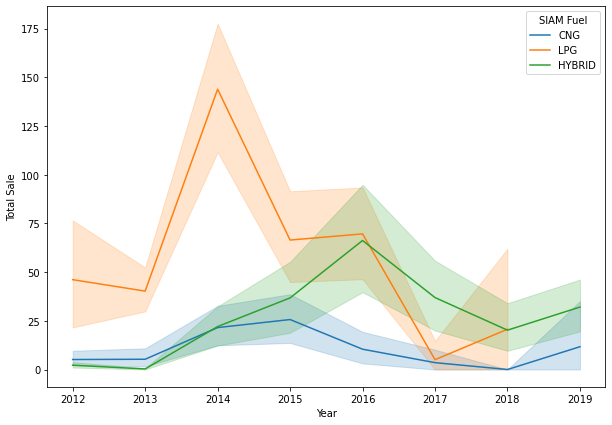

In [48]:
plt.figure(figsize=(10,7))
sns.lineplot(data=df[(df['SIAM Fuel'] != "PETROL")&(df['SIAM Fuel'] != "DIESEL")], x="Year", y="Total Sale",hue="SIAM Fuel")

### Sales with respect to different companies

In [49]:
df['SIAM Company Code'].unique()

array(['VOLKSWAGEN INDIA PVT LTD', 'TOYOTA KIRLOSKAR MOTOR PVT LTD',
       'SKODAAUTO INDIA PVT LTD', 'NISSAN MOTOR INDIA PVT LTD',
       'HYUNDAI MOTOR INDIA LTD', 'ASHOK LEYLAND LTD',
       'MAHINDRA & MAHINDRA LTD', 'HONDA CARS INDIA LTD',
       'HINDUSTAN MOTORS LTD', 'GENERAL MOTORS INDIA PVT LTD',
       'FORD INDIA PVT LTD', 'TATA MOTORS LTD', 'FORCE MOTORS LTD',
       'MARUTI SUZUKI INDIA LTD', 'FIAT INDIA AUTOMOBILES PVT LTD',
       'RENAULT INDIA PVT LTD', 'HINDUSTAN MOTOR FINANCE CORPORATION LTD',
       'ISUZU MOTORS INDIA PVT LTD', 'BMW', 'VOLVO'], dtype=object)

<AxesSubplot:xlabel='Year', ylabel='Total Sale'>

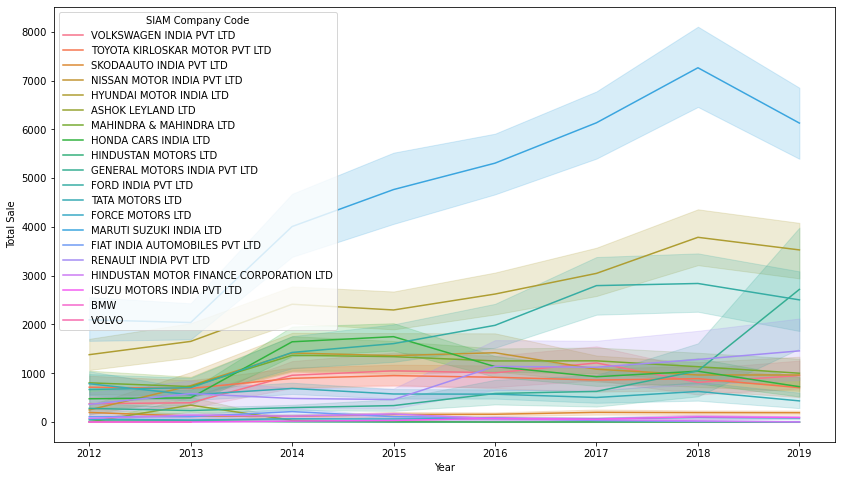

In [50]:
plt.figure(figsize=(14,8))
sns.lineplot(data=df, x="Year", y="Total Sale",hue="SIAM Company Code",markers=True, dashes=False)

Over the entire year (2012-2019)

<AxesSubplot:xlabel='SIAM Company Code'>

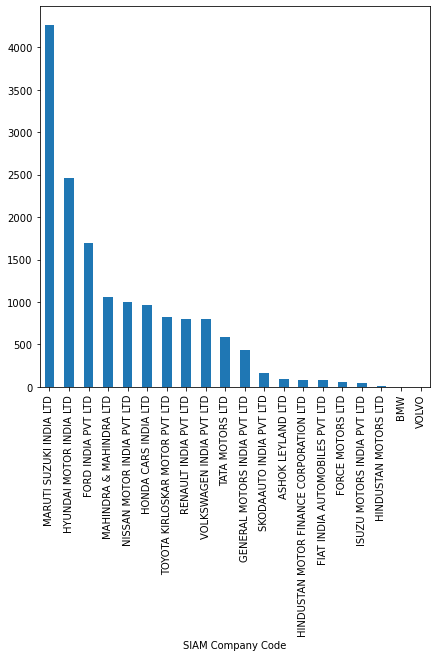

In [51]:
plt.figure(figsize=(7,7))
df.groupby('SIAM Company Code',sort=False).mean().sort_values(by='Total Sale',ascending=False)['Total Sale'].plot(kind='bar')

In the year 2019

<AxesSubplot:xlabel='SIAM Company Code'>

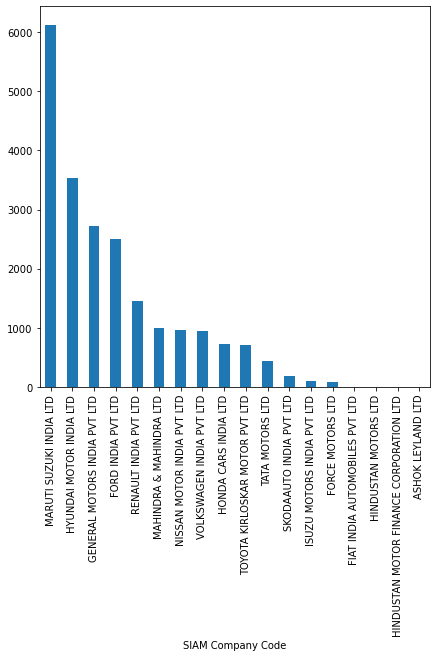

In [52]:
plt.figure(figsize=(7,7))
df[df['Year']==2019].groupby('SIAM Company Code',sort=False).mean().sort_values(by='Total Sale',ascending=False)['Total Sale'].plot(kind='bar')

#### Sales of different companies for Petrol vehicles

<AxesSubplot:xlabel='SIAM Company Code'>

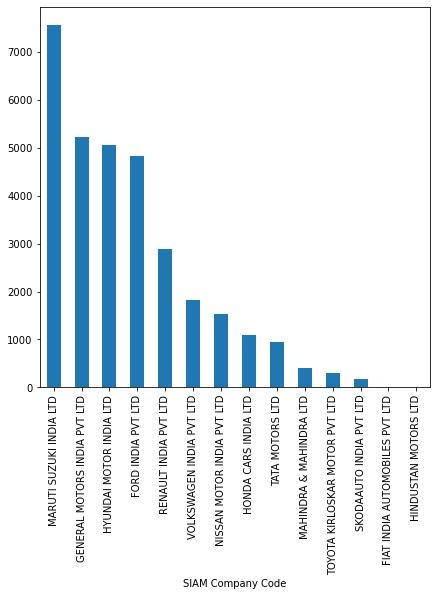

In [53]:
plt.figure(figsize=(7,7))
df[(df['Year']==2019)&(df['SIAM Fuel']=='PETROL')].groupby('SIAM Company Code',sort=False).mean().sort_values(by='Total Sale',ascending=False)['Total Sale'].plot(kind='bar')

#### Sales of different companies for Diesel vehicles

<AxesSubplot:xlabel='SIAM Company Code'>

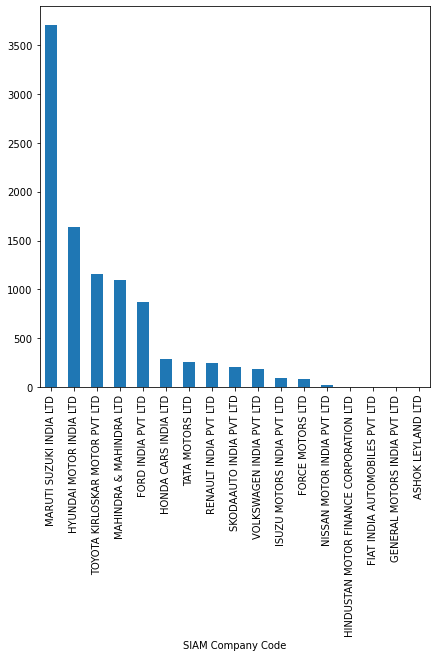

In [54]:
plt.figure(figsize=(7,7))
df[(df['Year']==2019)&(df['SIAM Fuel']=='DIESEL')].groupby('SIAM Company Code',sort=False).mean().sort_values(by='Total Sale',ascending=False)['Total Sale'].plot(kind='bar')

#### Sales of different companies for Hybrid, CNG, LPG vehicles

<AxesSubplot:xlabel='SIAM Company Code'>

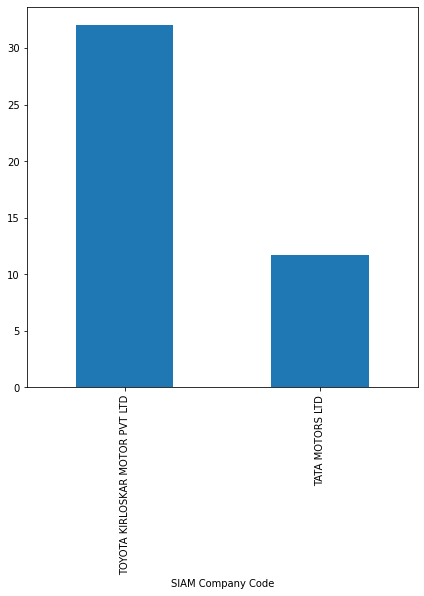

In [55]:
plt.figure(figsize=(7,7))
df[(df['Year']==2019)&((df['SIAM Fuel']=='HYBRID')|(df['SIAM Fuel']=='LPG')|(df['SIAM Fuel']=='CNG'))].groupby('SIAM Company Code',sort=False).mean().sort_values(by='Total Sale',ascending=False)['Total Sale'].plot(kind='bar')

#### Sales at each Segment 1 level over the years

<AxesSubplot:xlabel='Year', ylabel='Total Sale'>

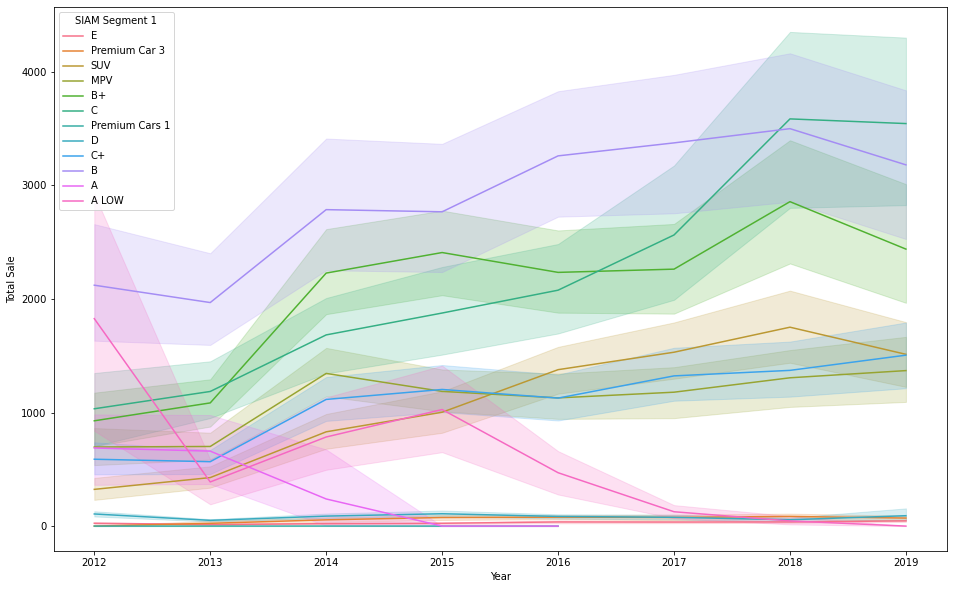

In [56]:
plt.figure(figsize=(16,10))
sns.lineplot(data=df, x="Year", y="Total Sale",hue="SIAM Segment 1",markers=True, dashes=False)

<AxesSubplot:xlabel='SIAM Segment 1'>

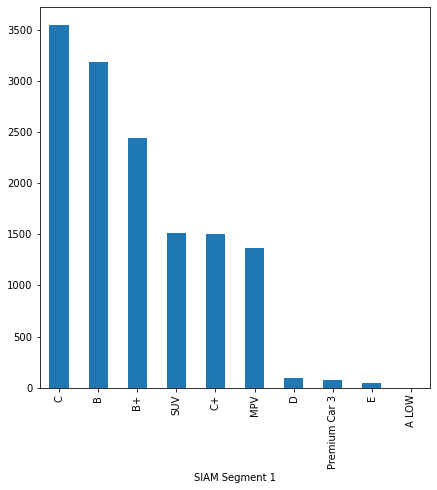

In [57]:
plt.figure(figsize=(7,7))
df[(df['Year']==2019)].groupby('SIAM Segment 1',sort=False).mean().sort_values(by='Total Sale',ascending=False)['Total Sale'].plot(kind='bar')

#### Sales at each Segment 2 level over the years

<AxesSubplot:xlabel='Year', ylabel='Total Sale'>

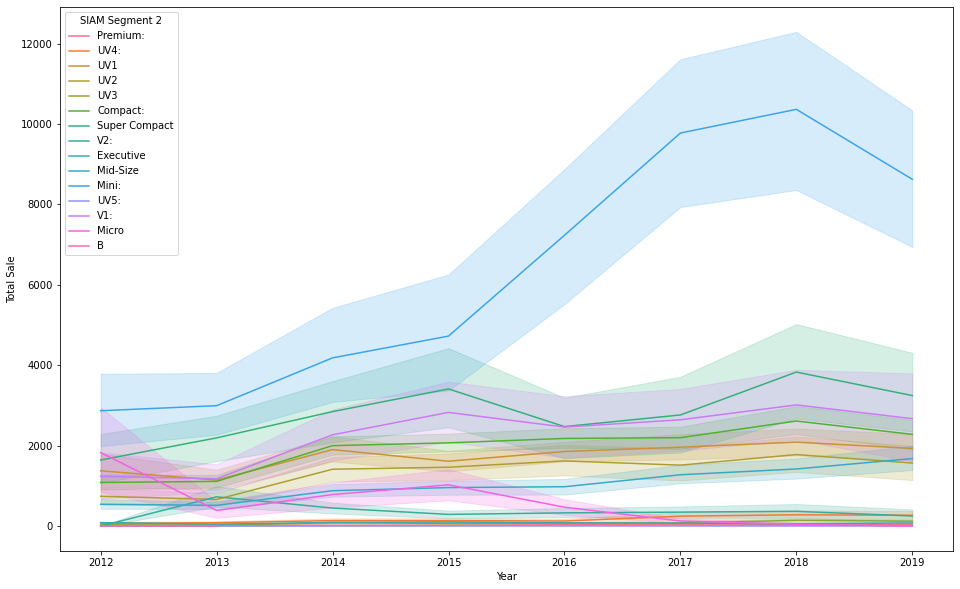

In [58]:
plt.figure(figsize=(16,10))
sns.lineplot(data=df, x="Year", y="Total Sale",hue="SIAM Segment 2",markers=True, dashes=False)

<AxesSubplot:xlabel='SIAM Segment 2'>

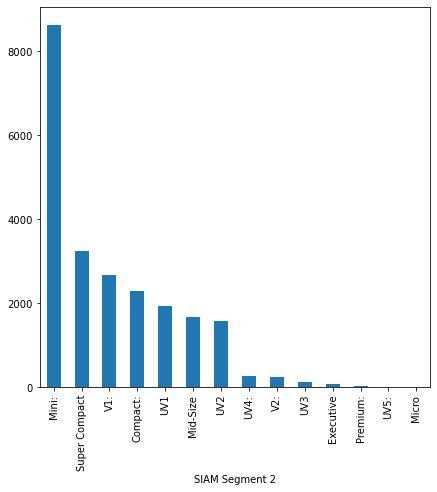

In [59]:
plt.figure(figsize=(7,7))
df[(df['Year']==2019)].groupby('SIAM Segment 2',sort=False).mean().sort_values(by='Total Sale',ascending=False)['Total Sale'].plot(kind='bar')

#### Sales at each category level over the years

<AxesSubplot:xlabel='Year', ylabel='Total Sale'>

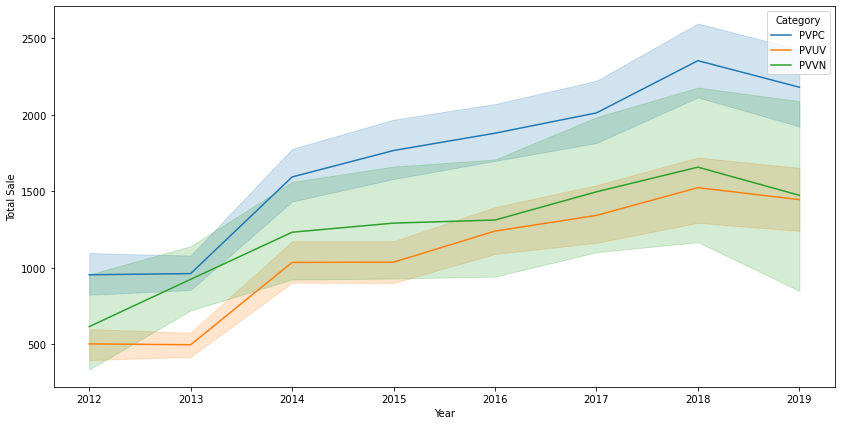

In [60]:
plt.figure(figsize=(14,7))
sns.lineplot(data=df, x="Year", y="Total Sale",hue="Category",markers=True, dashes=False)

<AxesSubplot:xlabel='Category'>

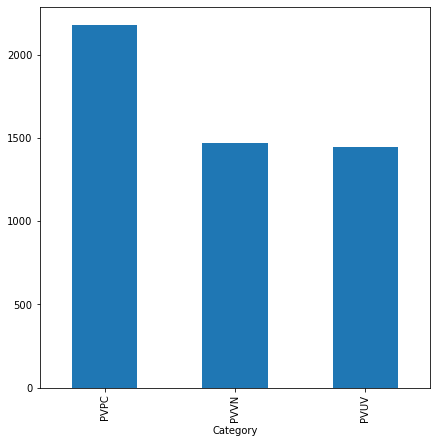

In [61]:
plt.figure(figsize=(7,7))
df[(df['Year']==2019)].groupby('Category',sort=False).mean().sort_values(by='Total Sale',ascending=False)['Total Sale'].plot(kind='bar')

#### Sales of different companies for PVPC Category vehicles

<AxesSubplot:xlabel='SIAM Company Code'>

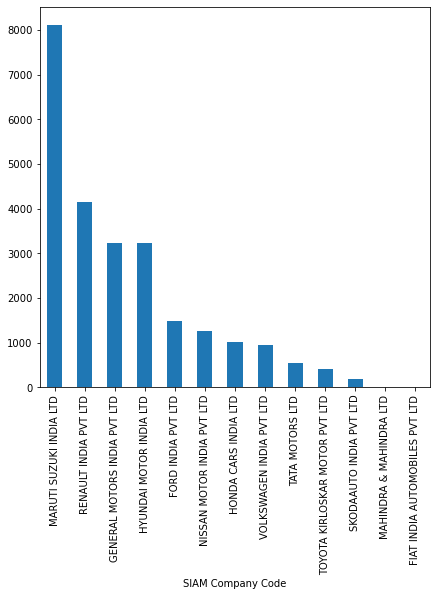

In [62]:
plt.figure(figsize=(7,7))
df[(df['Year']==2019)&(df['Category']=='PVPC')].groupby('SIAM Company Code',sort=False).mean().sort_values(by='Total Sale',ascending=False)['Total Sale'].plot(kind='bar')

#### Sales of different companies for PVVN Category vehicles

<AxesSubplot:xlabel='SIAM Company Code'>

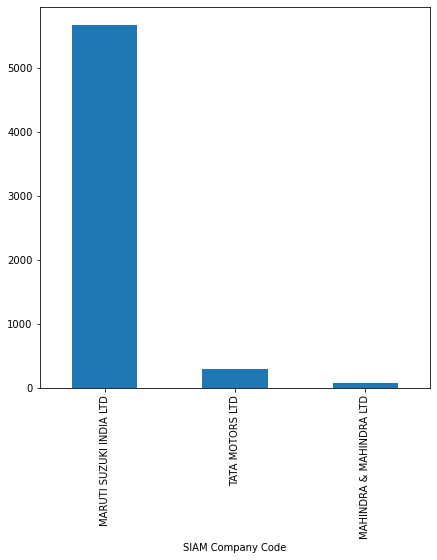

In [63]:
plt.figure(figsize=(7,7))
df[(df['Year']==2019)&(df['Category']=='PVVN')].groupby('SIAM Company Code',sort=False).mean().sort_values(by='Total Sale',ascending=False)['Total Sale'].plot(kind='bar')

#### Sales of different companies for PVUV Category vehicle

<AxesSubplot:xlabel='SIAM Company Code'>

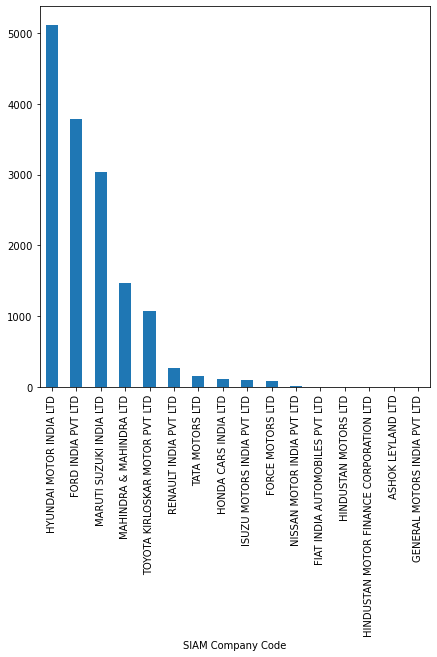

In [64]:
plt.figure(figsize=(7,7))
df[(df['Year']==2019)&(df['Category']=='PVUV')].groupby('SIAM Company Code',sort=False).mean().sort_values(by='Total Sale',ascending=False)['Total Sale'].plot(kind='bar')

## Key Insights:
- The total sales has been steadily decreasing from 2017 to 2019, to lowest record(till 2013)
- The sales within a year is observed to reach maximum during the months of April and September, minimum during June and year-end.
- The sales of Petrol, Diesel vehicles is showing negative trend from 2018, whereas positive trend is observed for Hybrid, CNG, LPG vehicles.
- Among the leading companies, Maruti Suzuki, Hyundai, Ford are observed to show negative trends in sales from 2018, whereas the sales for General Motors, Renault are increasing. Leading manufacturers (for the year 2019) for Petrol vehicles include Maruti, GM, for Diesel vehicles include Maruti, Hyundai and Toyota, Tata for Hybrid, CNG.
- At vehicle segment 1 level, top segments with respect to sales include C,B,B+,SUV,C+,MPV where sales have dropped for segments C,B,B+,SUV from 2018 whereas C+, MPV are showing positive trends.
- Among the category levels, sales in PVUV category is increasing relatively faster than the other categories. Top companies for each category for the year 2019 are as follows: (i)PVPC: Maruti, Renault (ii)PVVN: Maruti, Tata (iii)PVUV: Hyundai, Ford

## Sales Prediction for next 6 months 

In [65]:
df['YrMth_Date']=pd.to_datetime(df['YrMth'],dayfirst=True)

### Creating feature vector variable x

In [116]:
x=pd.DataFrame(data=df[['YrMth_Date','Category']])

In [117]:
x['Month']=x['YrMth_Date'].dt.month

In [118]:
x['Year']=x['YrMth_Date'].dt.year

In [119]:
features=['Month','Year','PVPC','PVUV','PVVN']
target='Total Sale'

In [120]:
cat_dummies = pd.get_dummies(x['Category'],drop_first=False)
x = pd.concat([x.drop('Category',axis=1),cat_dummies],axis=1)

In [121]:
x['Total Sale']=df['Total Sale']

In [122]:
x=x.drop('YrMth_Date',axis=1)

## Train-Test split:
Here, we are using data from 2015-2018 as training data, 2019 for testing

In [123]:
train = x[(x['Year']<=2018)&(x['Year']>=2015)]
test = x[x['Year']==2019]

In [124]:
x_train = train[features]
y_train = train[target]
x_test = test[features]
y_test = test[target]

In [125]:
import xgboost as xgb

In [126]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=5,
                       learning_rate=0.01)
reg.fit(x_train, y_train,
        eval_set=[(x_train, y_train), (x_test, y_test)],
        verbose=100)

[18:00:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:3809.47907	validation_1-rmse:4026.06954
[100]	validation_0-rmse:3439.77411	validation_1-rmse:3600.68474
[200]	validation_0-rmse:3386.35781	validation_1-rmse:3555.01275
[282]	validation_0-rmse:3379.32988	validation_1-rmse:3554.85334


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, ...)

### Making predictions for next 6 months

In [127]:
for j in range(6):
    new_row={"Month":j+1,
                       "Year":2020,
                       "PVPC":1,
                       "PVUV":0,
                       "PVVN":0,
                      }
    x_test.loc[len(x_test)] = new_row

C:\Users\sujay\anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [128]:
for j in range(6):
    new_row={"Month":j+1,
                       "Year":2020,
                       "PVPC":0,
                       "PVUV":1,
                       "PVVN":0,
                      }
    x_test.loc[len(x_test)] = new_row
for j in range(6):
    new_row={"Month":j+1,
                       "Year":2020,
                       "PVPC":0,
                       "PVUV":0,
                       "PVVN":1,
                      }
    x_test.loc[len(x_test)] = new_row

In [129]:
y_pred=reg.predict(x_test)

In [130]:
x_test['Pred Total Sale']=y_pred

C:\Users\sujay\AppData\Local\Temp/ipykernel_5816/2357116171.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test['Pred Total Sale']=y_pred


,Month,Year,PVPC,PVUV,PVVN,Pred Total Sale
17546,1,2019,0,1,0,1064.569580
17547,1,2019,0,1,0,1064.569580
17548,1,2019,0,1,0,1064.569580
17549,1,2019,0,1,0,1064.569580
17550,1,2019,0,1,0,1064.569580
...,...,...,...,...,...,...
1639,2,2020,0,0,1,1254.771606
1640,3,2020,0,0,1,1378.353394
1641,4,2020,0,0,1,1603.273560
1642,5,2020,0,0,1,1486.915405


<AxesSubplot:xlabel='Month', ylabel='Pred Total Sale'>

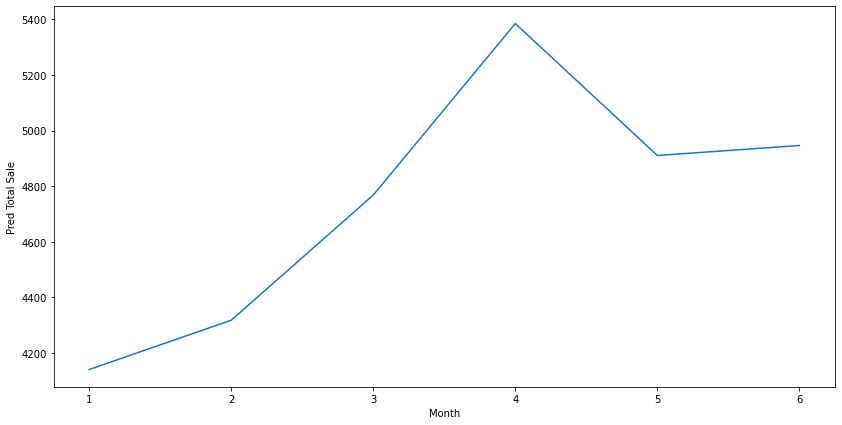

In [132]:
plt.figure(figsize=(14,7))
sns.lineplot(data=x_test[x_test['Year']==2020].groupby('Month',sort=False).sum(), y="Pred Total Sale", x="Month")

### Prediction for PVPC Category

<AxesSubplot:xlabel='Month', ylabel='Pred Total Sale'>

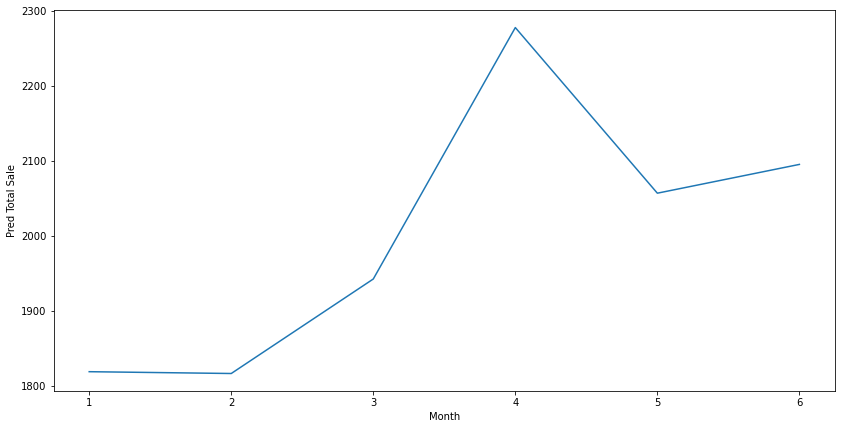

In [133]:
plt.figure(figsize=(14,7))
sns.lineplot(data=x_test[(x_test['Year']==2020)&(x_test['PVPC']==1)].groupby('Month',sort=False).sum(), y="Pred Total Sale", x="Month")

### Prediction for PVUV Category

<AxesSubplot:xlabel='Month', ylabel='Pred Total Sale'>

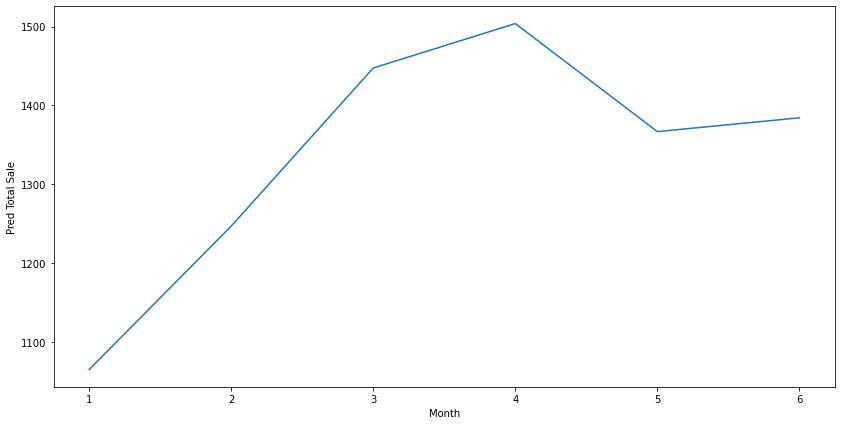

In [134]:
plt.figure(figsize=(14,7))
sns.lineplot(data=x_test[(x_test['Year']==2020)&(x_test['PVUV']==1)].groupby('Month',sort=False).sum(), y="Pred Total Sale", x="Month")

### Prediction for PVVN Category

<AxesSubplot:xlabel='Month', ylabel='Pred Total Sale'>

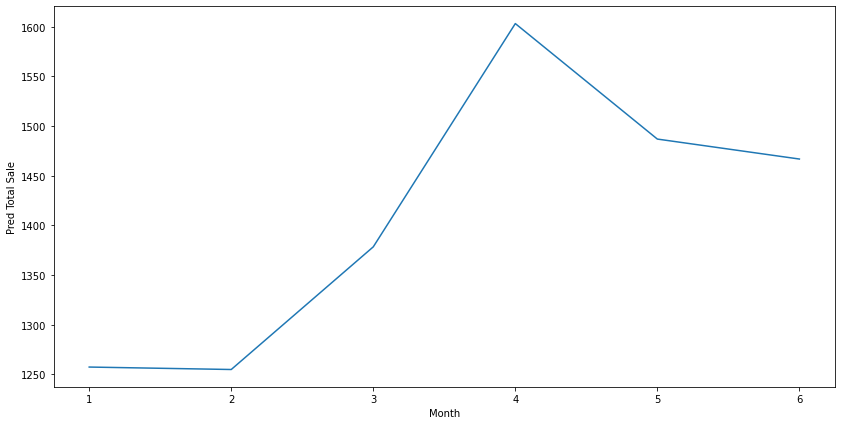

In [135]:
plt.figure(figsize=(14,7))
sns.lineplot(data=x_test[(x_test['Year']==2020)&(x_test['PVVN']==1)].groupby('Month',sort=False).sum(), y="Pred Total Sale", x="Month")